**Ссылка на набор данных:**

https://www.kaggle.com/zynicide/wine-reviews?select=winemag-data-130k-v2.csv

Настройка импортов при первом запуске (загрузка необходимых данных).

In [1]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from google.colab import drive

drive.mount('/content/drive')

count_of_texts = 10000

import pandas as pd

fixed_df = pd.read_csv('/content/drive/My Drive/winemag-data-130k-v2.csv')

print(fixed_df['description'][:count_of_texts])

corpus = [description for description in fixed_df['description'][:count_of_texts]]

#corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0       Aromas include tropical fruit, broom, brimston...
1       This is ripe and fruity, a wine that is smooth...
2       Tart and snappy, the flavors of lime flesh and...
3       Pineapple rind, lemon pith and orange blossom ...
4       Much like the regular bottling from 2012, this...
                              ...                        
9995    Comes from a little-understood part of the spr...
9996    Smoky and savory, with sharp acidity under bla...
9997    The style at Domaines Ott has changed to becom...
9998    It's interesting and a little odd that this 10...
9999    As befits a single vineyard Gevrey Chambertin,...
Nam

**Задание 1**

1.1 Убираем цифры из текста

In [2]:
def without_digits(text):
  text_without_digits = ''.join([word for word in text if not word.isdigit()])

  return text_without_digits

for i in range(0, len(corpus)):
  corpus[i] = without_digits(corpus[i])

#corpus

Убираем ссылки из текста

In [3]:
import re

def without_hrefs(text):
  text_without_hrefs = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)

  return text_without_hrefs

for i in range(0, len(corpus)):
  corpus[i] = without_hrefs(corpus[i])

#corpus

1.2 Выполняем токенизацию

In [4]:
def tokenize(text):
  sentences = nltk.sent_tokenize(text)

  tokenized_sentences = []

  for sentence in sentences:
    tokenized_sentences.append(nltk.word_tokenize(sentence))

  return tokenized_sentences

for i in range(0, len(corpus)):
  corpus[i] = tokenize(corpus[i])

#corpus

Убираем стоп-слова и пунктуацию

In [5]:
def without_stopwords(text):
  from nltk.corpus import stopwords
  from string import punctuation

  stopwords = stopwords.words('english') + [a for a in punctuation]

  clean_tokenized_sentences = []

  for sentence in text:
    clean_tokenized_sentences.append([word for word in sentence if word not in stopwords])

  return clean_tokenized_sentences

for i in range(0, len(corpus)):
  corpus[i] = without_stopwords(corpus[i])

#corpus

1.3 Нормализуем токены (применяем стемминг - нахождение основы для заданного слова)

In [6]:
from nltk.stem import PorterStemmer

def normalize(text):
  ps =PorterStemmer()

  normalized_sentences = []

  for sentence in text:
    normalized_sentences.append([ps.stem(token) for token in sentence])

  return normalized_sentences

for i in range(0, len(corpus)):
  corpus[i] = normalize(corpus[i])

#corpus

Представим предложения внутри одного документа как единый массив слов

In [7]:
def combine_sentences(doc):
    new_doc = []

    for sentence in doc:
      for word in sentence:
        new_doc.append(word)

    return new_doc

for i in range(0, len(corpus)):
    corpus[i] = combine_sentences(corpus[i])

#corpus

1.4 Ищем 50 самых важных фраз и заменяем ими слова

In [8]:
import gensim

phrases = gensim.models.Phrases(corpus, min_count=3, progress_per=10000, threshold=50)
phraser = gensim.models.phrases.Phraser(phrases)

bigram_sentences = phraser[corpus]

1.5 Считаем TF/IDF

In [9]:
from sklearn import cluster
from sklearn. feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vect_input = [" ".join(x) for x in bigram_sentences]
X = vectorizer.fit_transform(vect_input)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

#tf_idf.T

**Задание 2**

Настройка импортов при первом запуске (загрузка необходимых данных).

In [10]:
!pip install umap-learn
!pip install hdbscan

2.1 Используем UNAP, чтобы понизить размерность

In [11]:
import umap.umap_ as umap

umap_data = umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='cosine',
    ).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


2.2 Выполняем класстеризацию при помощи DBSCAN

In [12]:
import hdbscan

clusters = hdbscan.HDBSCAN(
    min_cluster_size=15,
    metric='euclidean',
                          
    cluster_selection_method='eom',
    prediction_data = True
).fit(umap_data)

2.3 Анализируем результаты

Количество кластеров: 45
Отсортированные кластеры по кол-ву вхождений слов в них: [(-1, 4303), (43, 800), (1, 744), (42, 678), (18, 514), (14, 260), (26, 253), (30, 216), (19, 210), (9, 206), (40, 174), (3, 156), (15, 154), (2, 137), (12, 112), (32, 94), (41, 93), (34, 77), (37, 58), (33, 55), (8, 47), (23, 47), (6, 44), (29, 43), (31, 38), (36, 33), (16, 33), (11, 33), (17, 32), (20, 28), (27, 28), (28, 26), (38, 25), (39, 24), (0, 23), (35, 23), (7, 23), (13, 22), (4, 22), (24, 21), (22, 20), (10, 19), (5, 18), (21, 18), (25, 16)]


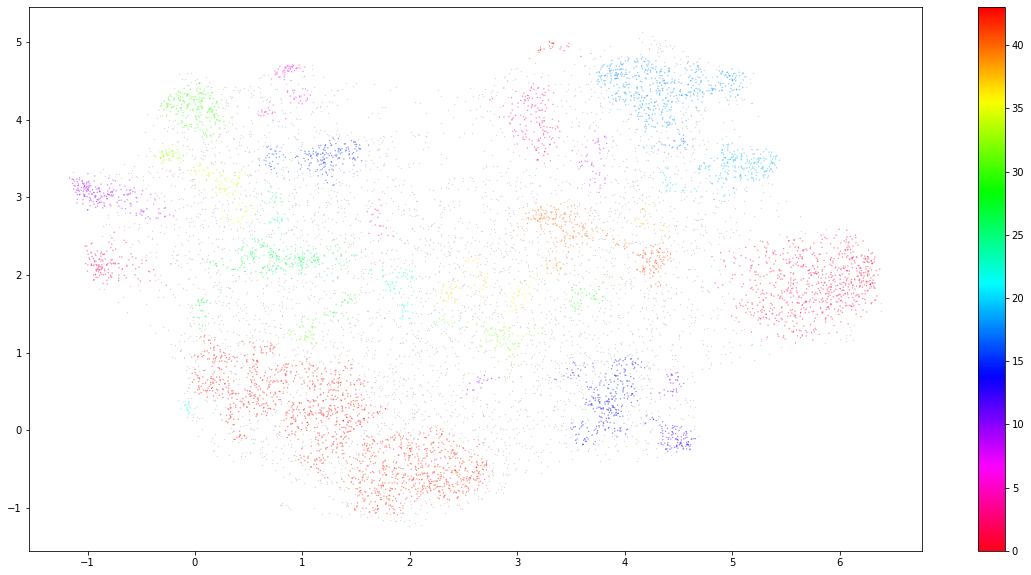

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

count = Counter(clusters.labels_)

print("Количество кластеров: {}".format(len(count)))
print("Отсортированные кластеры по кол-ву вхождений слов в них: {}".format(count.most_common()))

result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = clusters.labels_

fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

**Задание 3**

3.1 Получаем описания класстеров

In [14]:
import numpy as np

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
  labels = np.unique(prediction)
  dfs = []
  for label in labels:
    # !!! Не работает поиск индексов для каждого кластера !!!

    # id_temp = np.where(prediction==label) # индекс для каждого кластера
    # x_means = np.mean(tf_idf_array[id_temp], axis = 0) # возвращаем среднее значение по кластеру

    x_means = np.mean(tf_idf_array, axis = 0)
    sorted_means = np.argsort(x_means)[::-1][:n_feats] # берём топ n_feats
    features = vectorizer.get_feature_names_out()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs. append(df)

  return dfs

final_df_array = tf_idf.to_numpy()
prediction = hdbscan.approximate_predict(clusters, umap_data)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)

3.2 Показываем результирующую информацию о кластере

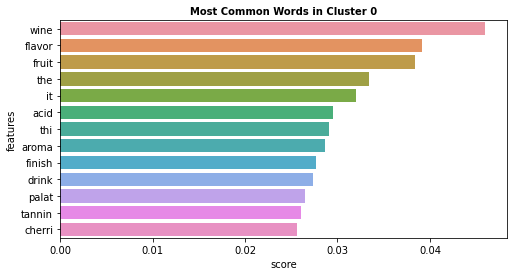

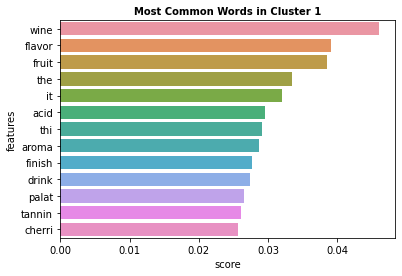

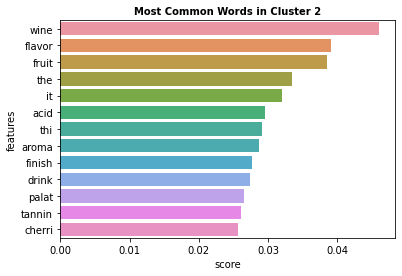

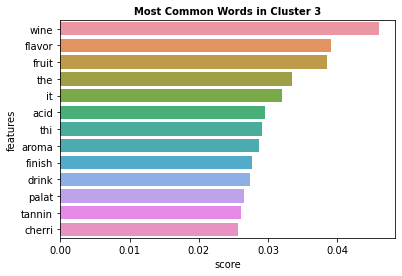

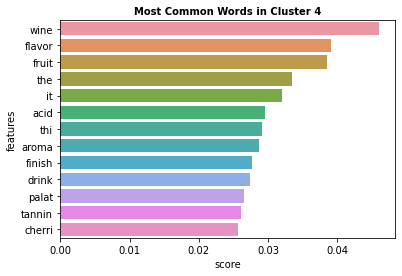

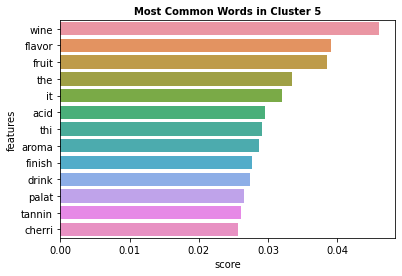

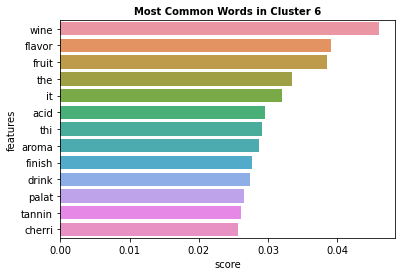

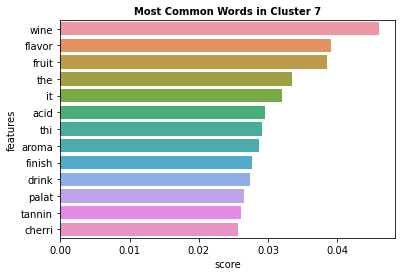

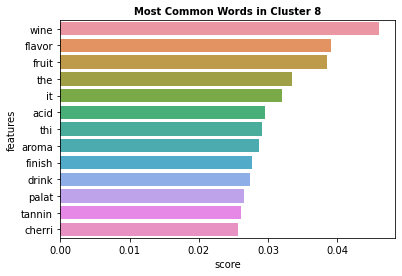

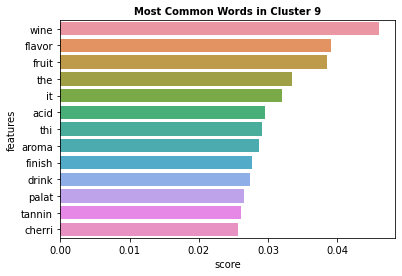

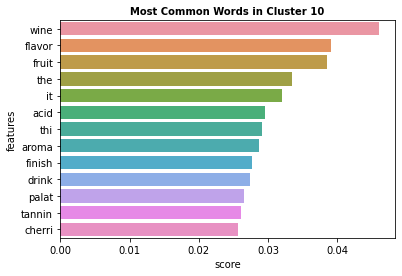

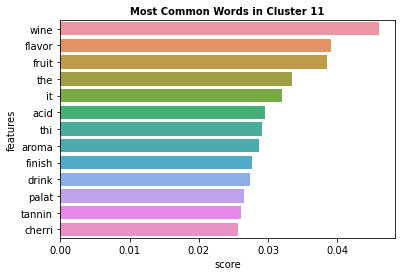

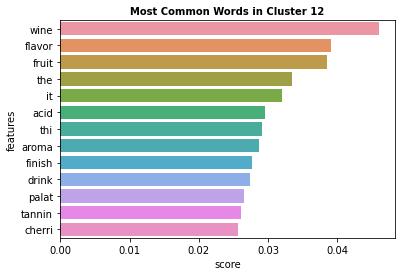

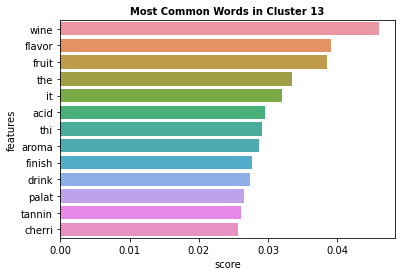

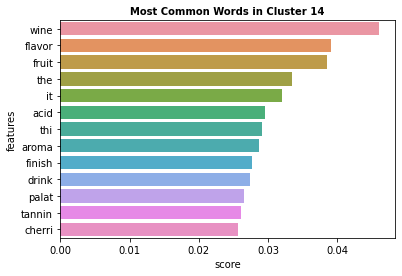

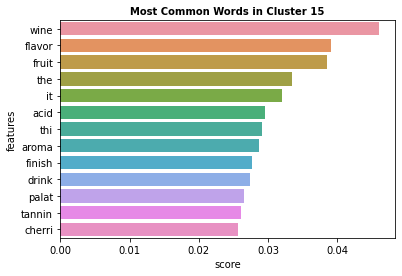

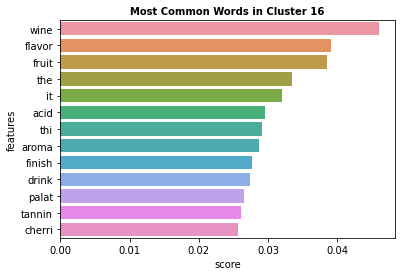

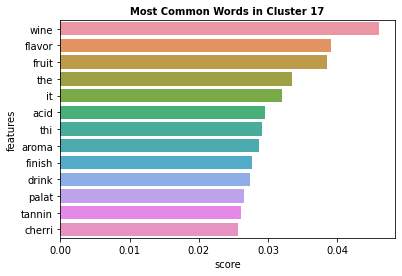

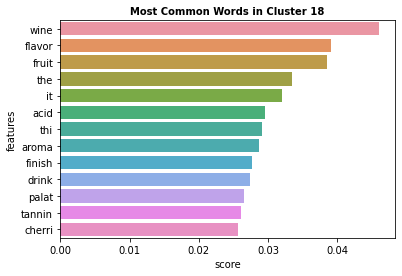

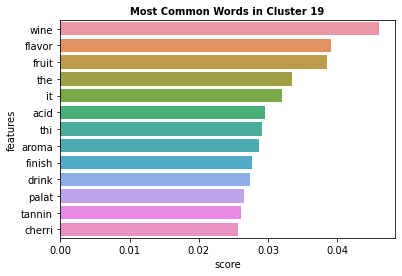

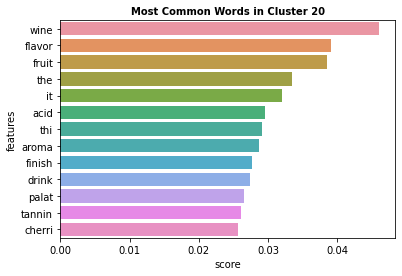

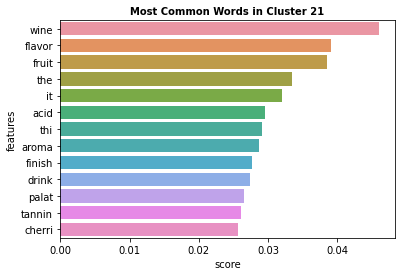

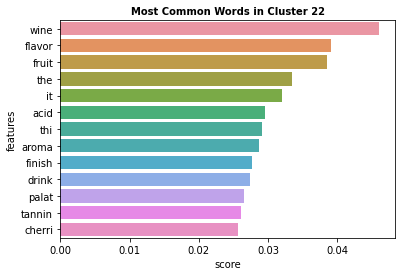

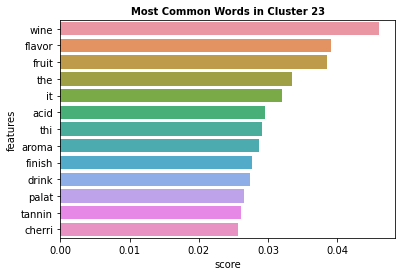

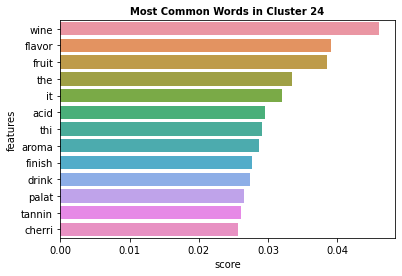

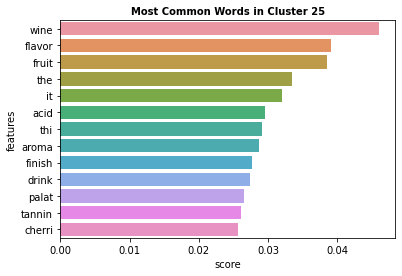

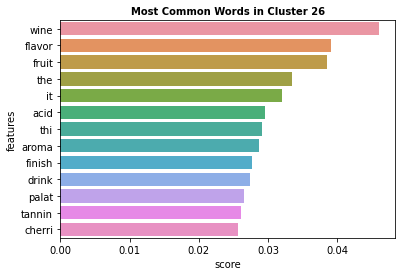

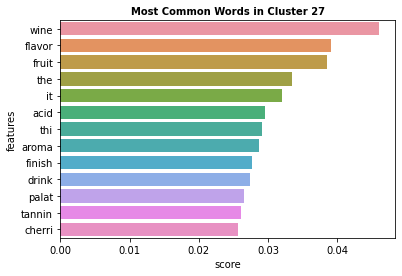

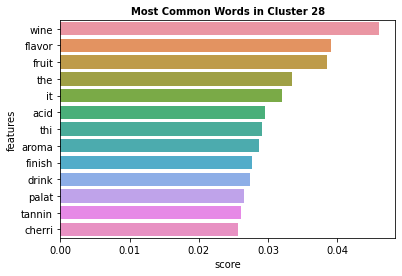

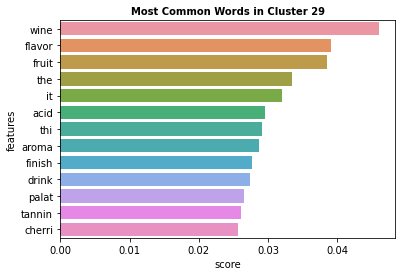

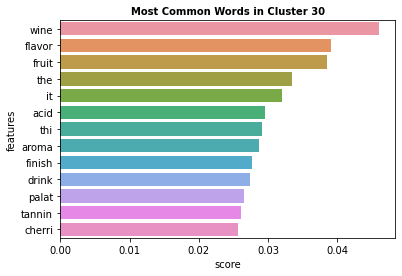

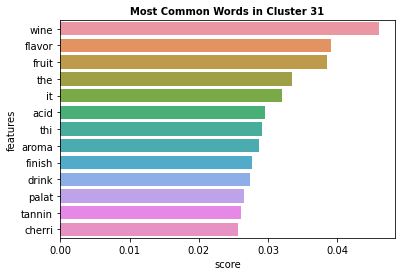

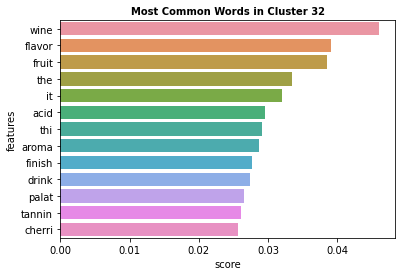

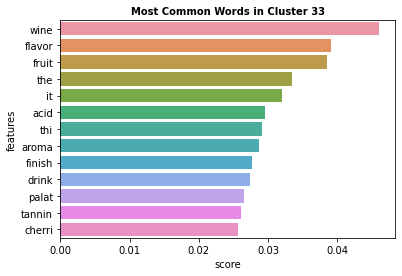

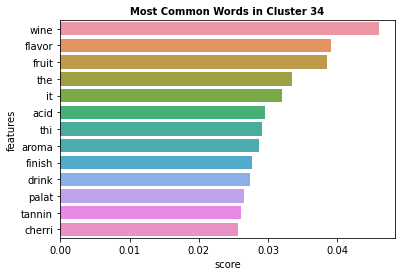

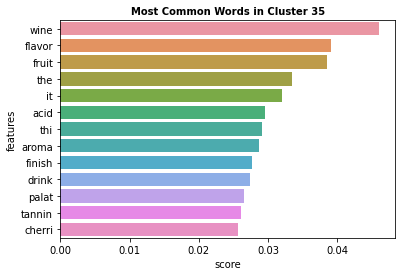

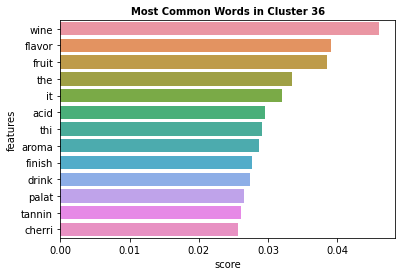

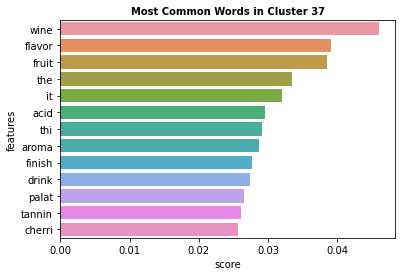

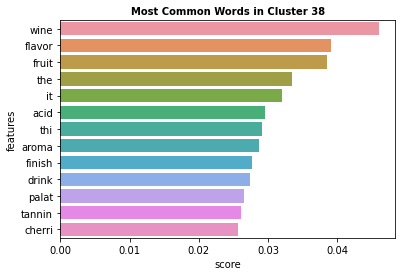

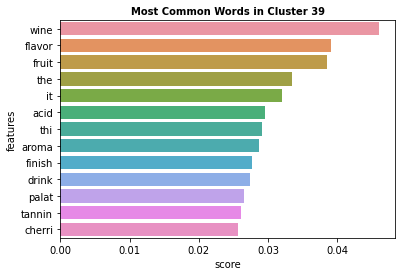

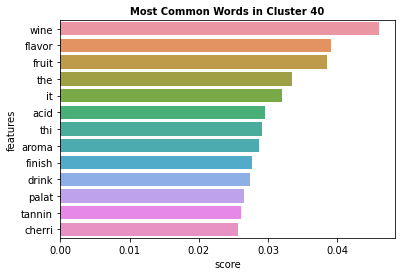

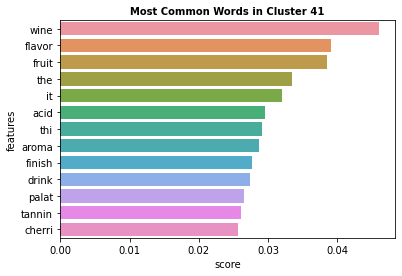

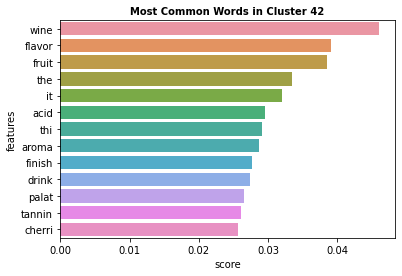

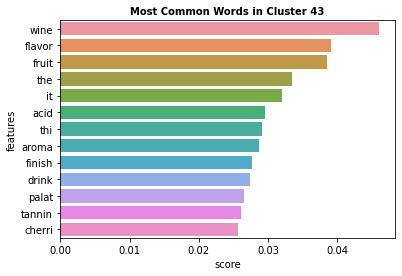

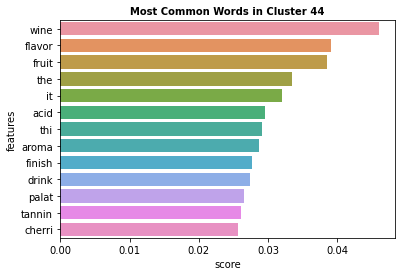

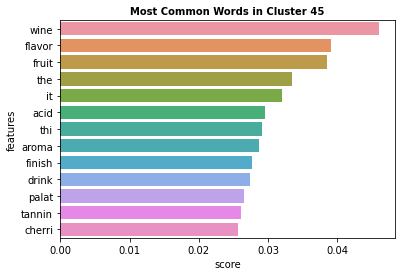

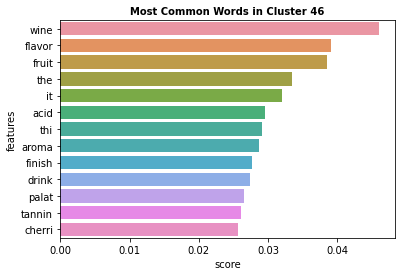

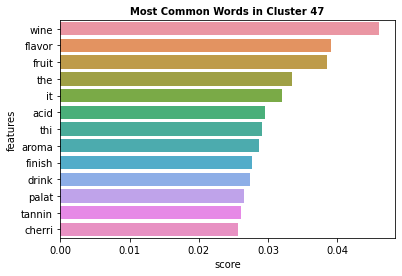

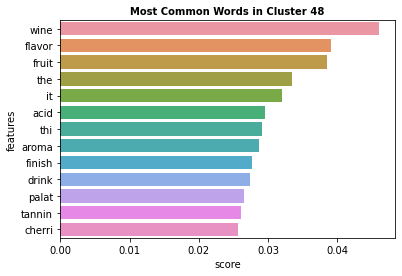

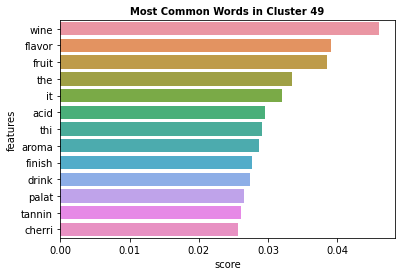

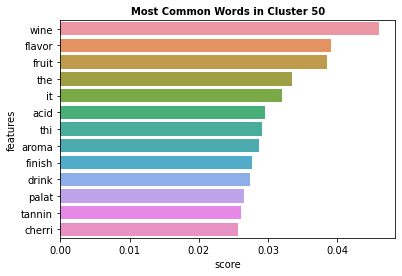

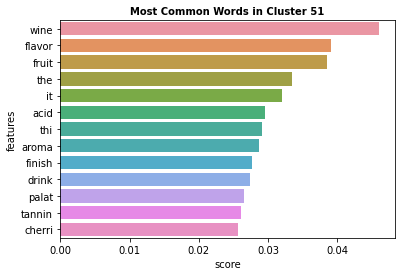

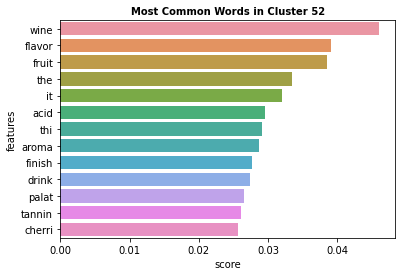

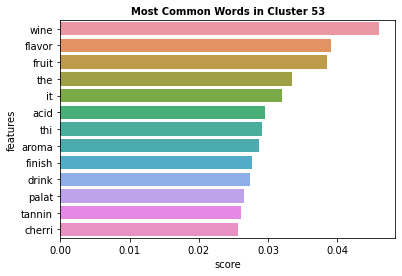

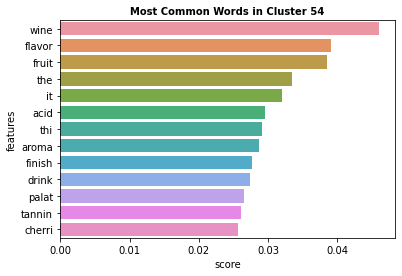

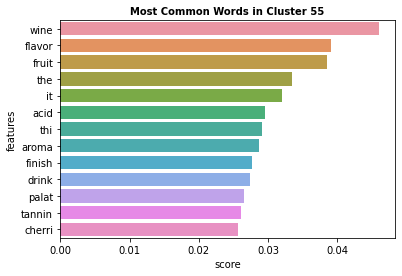

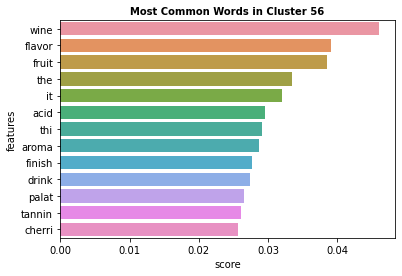

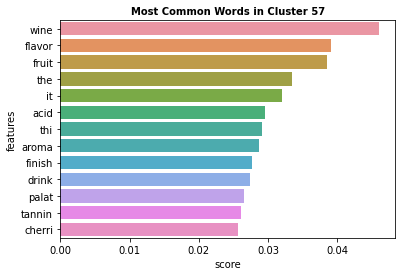

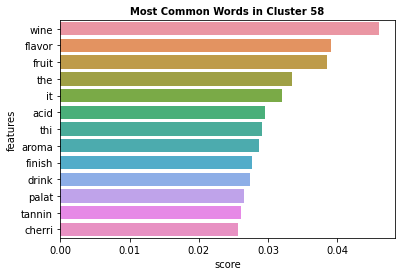

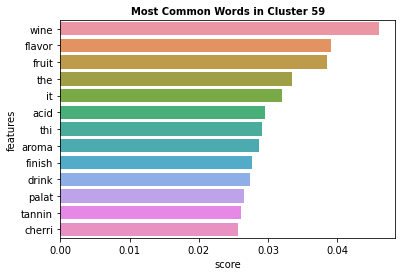

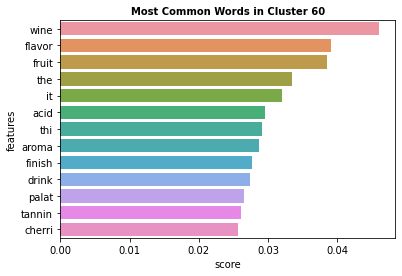

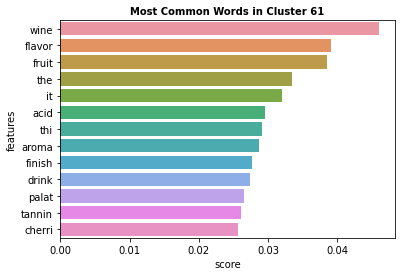

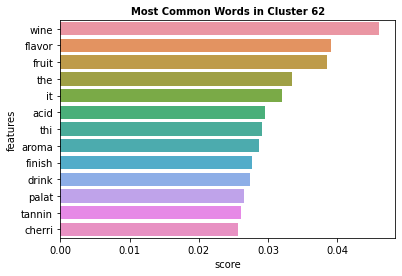

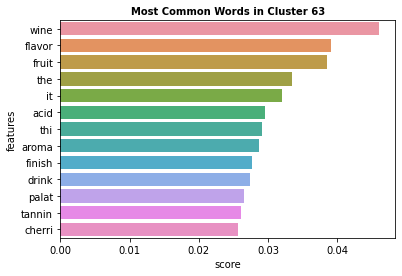

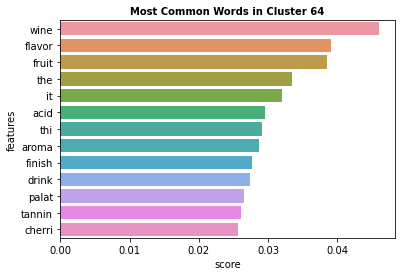

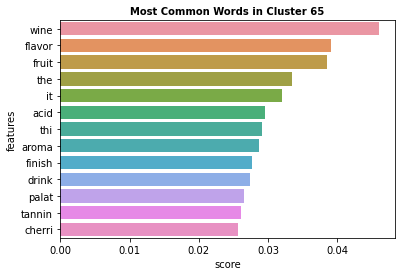

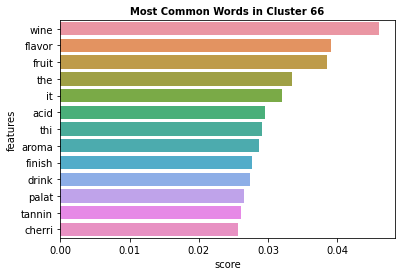

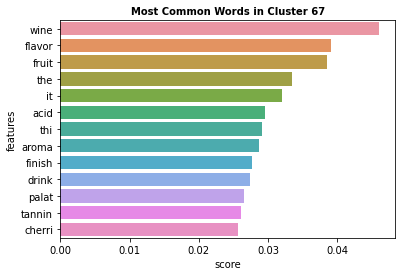

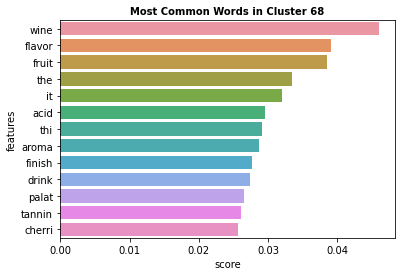

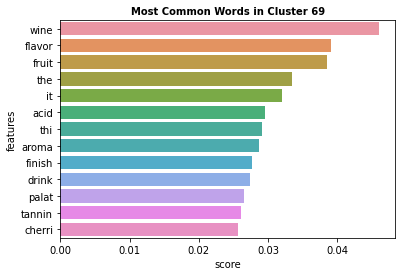

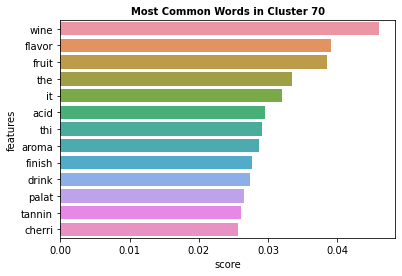

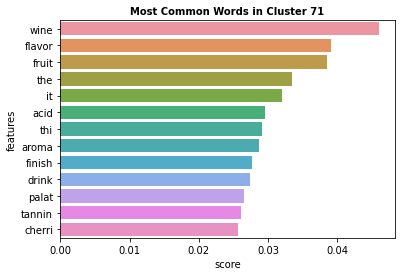

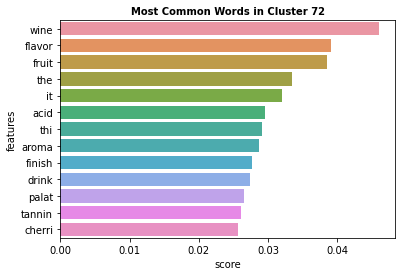

KeyboardInterrupt: ignored

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotWords(dfs, n_feats):
  plt.figure(figsize=(8, 4))
  for i in range(0, len(dfs)):
    plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
    sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
    plt. show()

plotWords(dfs, 13)

Закрываем файл на диске

In [ ]:
drive.flush_and_unmount()